The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit

In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

A term deposit is an interest-bearing bank deposit with a specified period of maturity. It is a money deposit at a banking institution that cannot be withdrawn for a specific term or period of time.

In [4]:
# Read the data
df = pd.read_csv('D:\\Data\\bank_term_deposit.csv')
df.head()          

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# pdays - number of days that passed by after the client was last contacted from a previous campaign
# previous: number of contacts performed before this campaign and for this client 
# poutcome: outcome of the previous marketing campaign 

In [5]:
# Checking the shape of the data
df.shape

(11162, 17)

In [6]:
# Checking the different data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

#### Checking the distribution of numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2261C1BA8>,
      dtype=object)

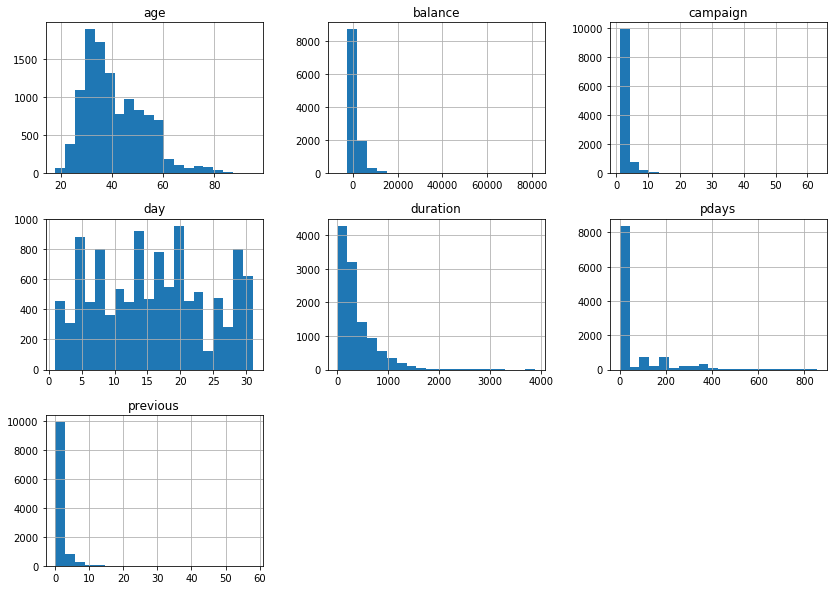

In [7]:
df.hist(bins = 20, figsize = (14,10))

Since most of our data is skewed so we have to scale our features

In [8]:
# Checking the missing values
df.isnull().any().sum()

0

In [9]:
# Checking the statistical summary of our data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
# Checking the Summary of Categorical Datt
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [10]:
# Checking the Duplicate observation
df.duplicated().sum()

0

In [11]:
# Checking the count of different job
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

#### Visualizing Categorical Features

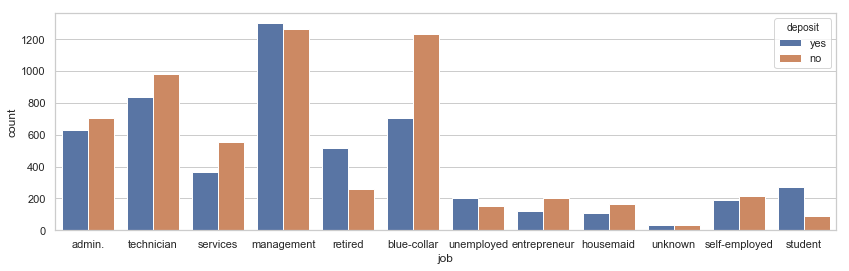

In [11]:
plt.figure(figsize=(14,4))
sns.set(style='whitegrid')
sns.countplot(x='job', hue = 'deposit', data = df)

In [12]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

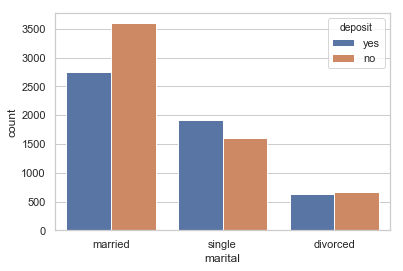

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue = 'deposit', data = df)

In [14]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

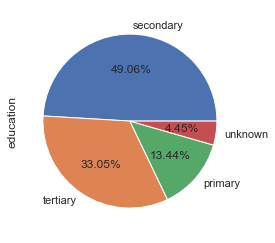

In [15]:
df.education.value_counts().plot.pie(autopct='%1.2f%%')

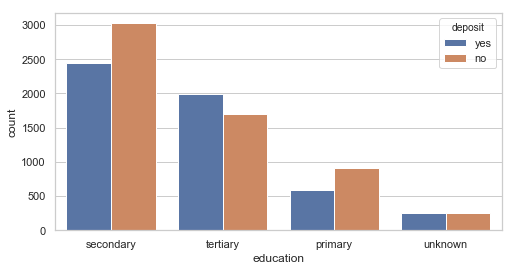

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='education', hue = 'deposit', data = df)

In [17]:
df.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

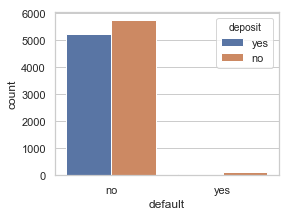

In [18]:
plt.figure(figsize=(4,3))
sns.countplot(x='default', hue = 'deposit', data = df)

In [20]:
df.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

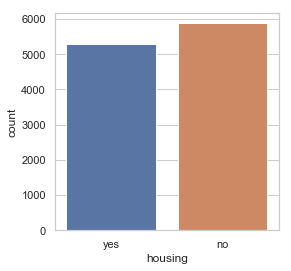

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(x='housing', data = df)

In [22]:
df.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

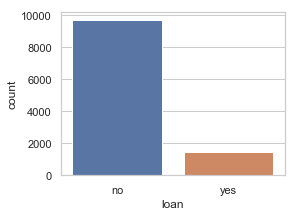

In [20]:
plt.figure(figsize=(4,3))
sns.countplot(x='loan', data = df)

In [24]:
df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

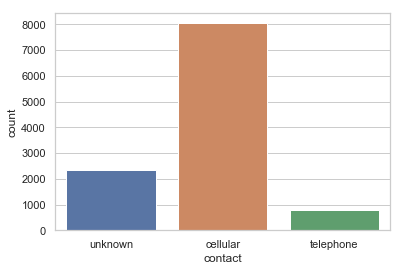

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='contact', data = df)

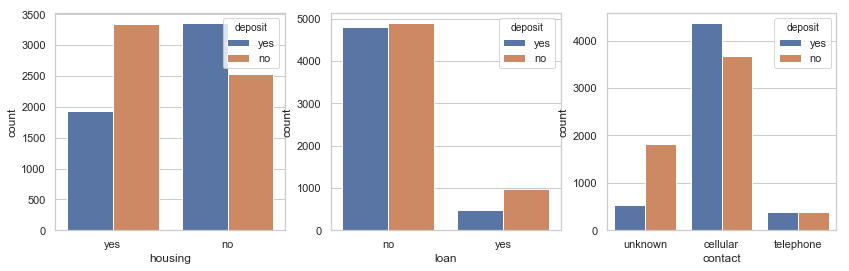

In [22]:
plt.figure(figsize = (14,4))
plt.subplot(1,3,1)
sns.countplot(x='housing',hue = 'deposit', data = df)
plt.subplot(1,3,2)
sns.countplot(x='loan',hue = 'deposit', data = df)
plt.subplot(1,3,3)
sns.countplot(x='contact',hue = 'deposit', data = df)

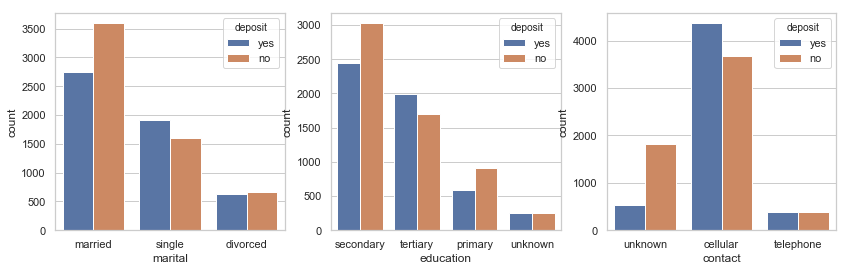

In [24]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[14,4])
plt.subplot(1,3,1)
sns.countplot(x='marital', hue='deposit', data=df)
plt.subplot(1,3,2)
sns.countplot(x='education', hue='deposit', data=df)
plt.subplot(1,3,3)
sns.countplot(x='contact', hue='deposit', data=df)
plt.show()

In [30]:
df.month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

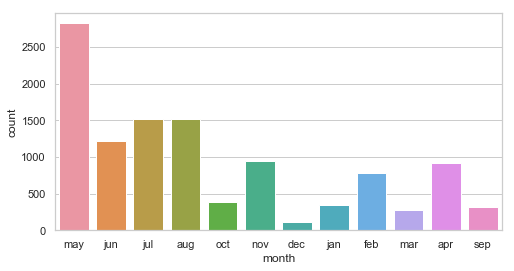

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='month', data = df)

In [26]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

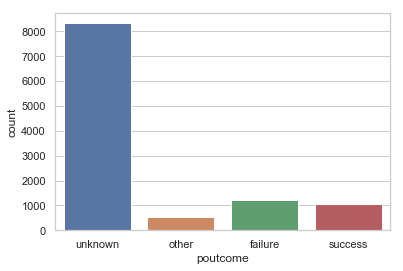

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='poutcome', data = df)

### Class Distribution

In [27]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

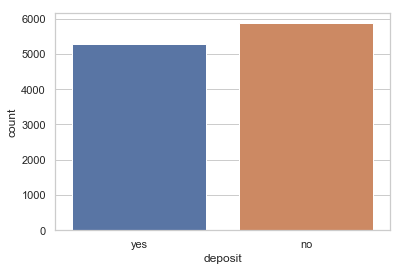

In [30]:
sns.countplot(x='deposit',data = df)

#### Splitting the Target Variables

In [31]:
x = df.iloc[:,df.columns != 'deposit']
y = df.iloc[:,df.columns == 'deposit']

In [32]:
y['deposit'] = y.deposit.map({'no':0,'yes':1})

#### Separating Categorical and Numerical Variables

In [33]:
cat_var = [col for col in x.columns.values if x[col].dtype == 'object']
df_cat = x[cat_var]
df_num = x.drop(cat_var,axis=1)

In [34]:
df_cat.shape[1]

9

In [35]:
df_num.shape[1]

7

#### Dummy Coding

In [36]:
df_dummies = pd.get_dummies(df_cat,drop_first = True)

In [37]:
df_dummies.shape[1]

35

In [38]:
data = pd.concat([df_num,df_dummies],axis=1)
data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
data.shape

(11162, 42)

#### Feature Scaling

In [40]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(data)

In [41]:
u = pd.DataFrame(scaled)

#### Principal Component Analysis

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=22)
x_pca = pca.fit_transform(scaled)
pc = pd.DataFrame(x_pca)

In [43]:
pca.explained_variance_ratio_

array([0.64551862, 0.10054043, 0.08823422, 0.04458218, 0.0225997 ,
       0.01614021, 0.01272684, 0.00888409, 0.00865404, 0.00629879,
       0.00422557, 0.0041447 , 0.00347705, 0.00331238, 0.00286269,
       0.00266831, 0.00236278, 0.00223658, 0.00208455, 0.00168907,
       0.00160102, 0.00145327])

In [44]:
pca.explained_variance_ratio_.sum()

0.9862970777103999

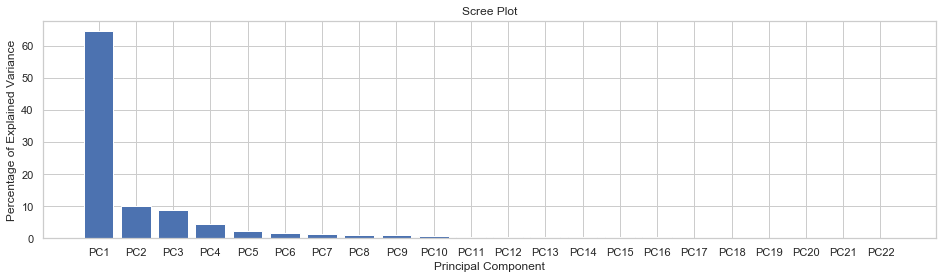

In [45]:
plt.subplots(figsize = (16,4))
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### Splitting the Data into Train and Test Set

In [46]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(pc,y,test_size = 0.30,random_state = 1)
print('x_train :' ,x_train.shape)
print('x_test :' ,x_test.shape)
print('y_train :' ,y_train.shape)
print('y_test :' ,y_test.shape)

x_train : (7813, 22)
x_test : (3349, 22)
y_train : (7813, 1)
y_test : (3349, 1)


### Decision Tree Classifier Base Model

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

#### AUC-ROC Curve

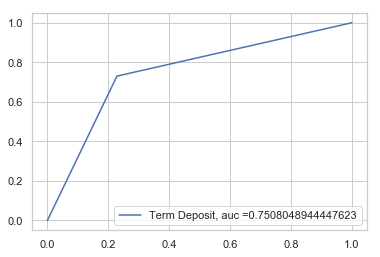

In [48]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = 'Term Deposit, auc ='+str(auc))
plt.legend(loc = 4)
plt.show()

In [49]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)
tmp2 = pd.Series({'Model': " Decision Tree with GINI ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred)})
model_dt = models_report.append(tmp2, ignore_index = True)
model_dt

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with GINI,0.750805,0.742638,0.730019,0.751866,0.502024


#### Grid Search 

In [50]:
# Set the parameters for grid search
grid_search_parameters = {'criterion':['gini','entropy'],
                          'min_samples_split':[2],
                          'max_depth': [None,2, 3],
                         'min_samples_leaf': [1,5],
                          'max_leaf_nodes':[None],
                         }

In [51]:
from sklearn.model_selection import GridSearchCV

# Create an instance of Decision Tree Classifier()
classifier = DecisionTreeClassifier()

# Use GridSearchCV() , pass the values you have set for grid search
model_DT_Grid = GridSearchCV(classifier, grid_search_parameters,cv = 10)
#Creating a train model using Grid Search
model_DT_Grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2], 'max_depth': [None, 2, 3], 'min_samples_leaf': [1, 5], 'max_leaf_nodes': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
model_DT_Grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [53]:
model_DT_Grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
test_pred = model_DT_Grid.predict(x_test)

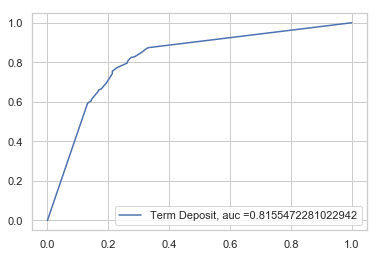

In [55]:
y_pred_proba = model_DT_Grid.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = 'Term Deposit, auc ='+str(auc))
plt.legend(loc = 4)
plt.show()

In [56]:
# Create a list of parameter 
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
# Create a dataframe of the above list
models_report = pd.DataFrame(columns = cols)
# Create a result associated with the list mentioned above.
tmp2 = pd.Series({'Model': " Decision Tree with Gini & Grid Search",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred),
                 'Precision Score': metrics.precision_score(y_test, test_pred),
                 'Recall Score': metrics.recall_score(y_test,test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test,test_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test,test_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_dt_gs = models_report.append(tmp2, ignore_index = True)
model_dt_gs

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with Gini & Grid Search,0.770931,0.759773,0.758339,0.771574,0.541911


#### Bagging

In [57]:
best_model = model_DT_Grid.best_estimator_
best_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
from sklearn.ensemble import BaggingClassifier
#Creating an object instance of Bagging Classifier
bagging = BaggingClassifier(best_model, random_state=1)
# Creating a train model after performing bagging
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

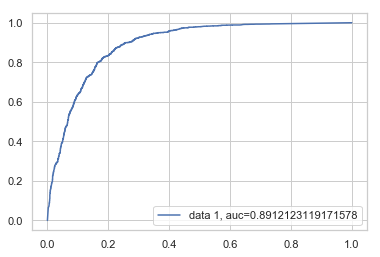

In [59]:
# Calculate the predicted probability on the test data 
y_pred_proba = bagging.predict_proba(x_test)[::,1]
# Creating the roc curve on y_test and y_pred_proba
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# Find area under roc curve 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# Using plt.plot ,plot auc score on the label
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#Print out label on the graph and loc value 
plt.legend(loc=4)
#Showing the plot
plt.show()

In [60]:
test_pred_bag = bagging.predict(x_test)

# Create a result associated with the list mentioned above.
tmp2 = pd.Series({'Model': " Decision Tree with Bagging Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, test_pred_bag)})

# Below code will append the above tmp2 series in model_report dataframe
model_dt_bag = models_report.append(tmp2, ignore_index = True)
model_dt_bag

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with Bagging Classifier,0.820225,0.800977,0.825677,0.819946,0.639491


### Boosting

In [61]:
#Creating an object instance of AdaBoost Classifier
adb = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)
#Creating a train model
mod_boost = adb.fit(x_train,y_train)

In [62]:
#Performing prediction on Adaboost Classifier
mod_pred = adb.predict(x_test)

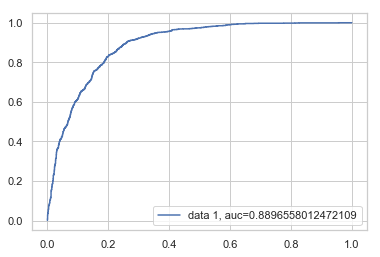

In [63]:
# Calculate the predicted probability on the test data 
y_pred_proba = mod_boost.predict_proba(x_test)[::,1]
# Creating the roc curve on y_test and y_pred_proba
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# Find area under roc curve 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# Using plt.plot ,plot auc score on the label
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#Print out label on the graph and loc value 
plt.legend(loc=4)
#Showing the plot
plt.show()

In [64]:
# Create a list of parameter 
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
# Create a dataframe of the above list
models_report = pd.DataFrame(columns = cols)

# Create a result associated with the list mentioned above.
tmp1 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test,mod_pred),
                 'Precision Score': metrics.precision_score(y_test,mod_pred),
                 'Recall Score': metrics.recall_score(y_test,mod_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test,mod_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test,mod_pred)})
.3
# Below code will append the above tmp2 series in model_report dataframe
model_dt_adb = models_report.append(tmp1, ignore_index = True)
model_dt_adb

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Adaboost Classifier,0.804946,0.801155,0.786029,0.805912,0.610452


### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

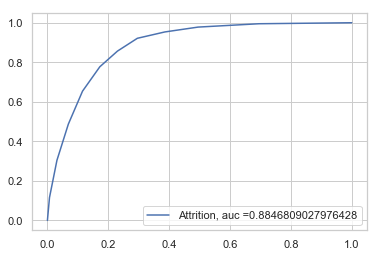

In [66]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = 'Attrition, auc ='+str(auc))
plt.legend(loc = 4)
plt.show()

In [67]:
# Create a result associated with the list mentioned above.
tmp3 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_rt = models_report.append(tmp3, ignore_index = True)
model_rt

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest Classifier,0.80253,0.802991,0.777218,0.803822,0.606004


In [68]:
# Comparison of Models of Different Algorithm  based on criterion and max_features

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
model_rf = pd.DataFrame(columns = cols)
model = model_rf.append([model_dt,model_dt_gs,model_dt_bag,
                            model_dt_adb,model_rt], 
                           ignore_index = True)
model

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with GINI,0.750805,0.742638,0.730019,0.751866,0.502024
1,Decision Tree with Gini & Grid Search,0.770931,0.759773,0.758339,0.771574,0.541911
2,Decision Tree with Bagging Classifier,0.820225,0.800977,0.825677,0.819946,0.639491
3,Adaboost Classifier,0.804946,0.801155,0.786029,0.805912,0.610452
4,Random Forest Classifier,0.802530,0.802991,0.777218,0.803822,0.606004


Here, it is observed that Decision Tree Classifier using Bagging was performing better among all the classsifers, so we can use this classifer for predicting which customer will subscribe or not.